## 实验六 Knn算法实现

#### 一、实验目的

Knn是一种简单、但是功能强大的分类算法，可以实现复杂的分类效果。Knn是一种有监督的机器学习方法。\
本实验首先安装配置好Anaconda以及Python环境，通过在iris数据集上用Knn算法实现分类操作，从而使同学们熟练掌握Knn算法的原理并学会将其运用到实践中。

#### 二、实验平台
   1. 操作系统：Windows10；
   2. Anaconda 版本：5.3.0； 
   3. Python 版本：3.6.8；
   
#### 三、实验内容
1. 在自己电脑上完成Anaconda安装以及Python环境配置，并将重要的截图放入实验报告。\
   参考资料：https://blog.csdn.net/u012325865/article/details/80455268
2. 给出一个使用scikit learn软件包实现iris数据集分类的例子,要求同学们将例子中的Knn算法实现出来，即自己写一个Knn算法实现iris数据集分类。

#### Iris数据集介绍：
Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

Sepal.Length（花萼长度），单位是cm;\
Sepal.Width（花萼宽度），单位是cm;\
Petal.Length（花瓣长度），单位是cm;\
Petal.Width（花瓣宽度），单位是cm;\
种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。


#### 实验实例：

#### The Dataset
在本实例中，我们使用iris数据集。该数据集有四个属性sepal-width, sepal-length, petal-width and petal-length，我们的目的是根据这四个属性，判定某个植物属于哪个类别，Iris-setosa, Iris-versicolor and Iris-virginica。

首先导入必要的库。

In [106]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

装载数据集，数据集的形式是pandas dataframe

In [107]:
url = "iris.csv"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

查看数据集的前5行

In [108]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Preprocessing
把数据集分解出属性（X）和标签(y)，使用pandas的纵向切割方法。

In [109]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Train Test Split
把数据集划分成训练集和测试集。\
80%的数据划分到训练集，20%的数据划分到测试集。

In [110]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

#### Feature Scaling

原始数据的取值范围变化很大，有必要对数据进行normalization规范化处理，在这里对X进行缩放。\
欧式距离需要在规范化的数据上运算，才能给出正确的结果。

In [111]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

#### Training and Predictions

对模型进行训练和使用模型进行预测

In [112]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

在测试集上进行预测。

In [113]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

#### Evaluating the Algorithm

为了评估一个模型的优劣，我们可以使用confusion matrix, precision, recall 以及f1 score等指标和手段。

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Comparing Error Rate with the K Value

在knn算法中，有一个k的选择问题，什么样的一个k能够获得较好的分类效果呢（准确率）？\
我们可以把各种可能的k的取值，及其对应的分类误差率（error rate）绘制在一张图上。\
在这里，我们选择的k的取值范围为[1,40]。

In [115]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

计算了k=1-40的error rate以后，我们可以绘制图形来看看。

Text(0, 0.5, 'Mean Error')

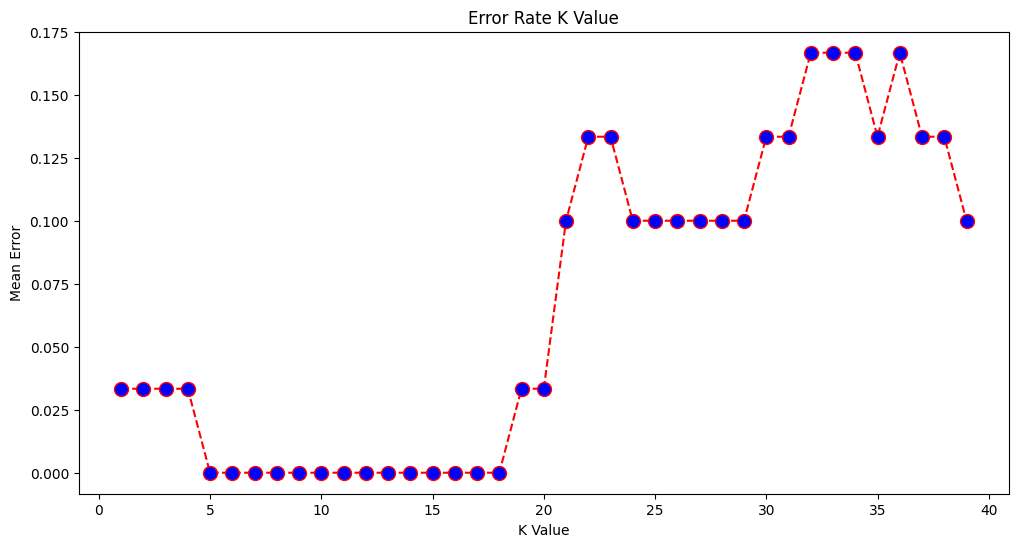

In [116]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

根据上图结果，K取5-18都可以

#### 四、实验要求

实验要求运行实验大纲中给出的实例，并弄懂整个代码流程，然后**独自编码实现Knn算法**，并对iris数据集进行分类，不得抄袭。\
考查方式：给助教看运行结果，助教提问有关实验实例或自己编写的代码的相关问题。

#### 程序参考代码

In [117]:
import numpy as np
from math import  sqrt
from collections import  Counter
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

class KNNClassifier:

    def __init__(self,k):
        assert k>=1,"k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert  X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k"

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        """给定单个待预测数据x,返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        """
        在下方填写代码并运行程序
        """
        x=np.array(x).reshape((1,-1))
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest_K = np.argsort(distances)
        top_k = [self._y_train[i] for i in nearest_K[:self.k]]
        count = Counter(top_k)
        y_predict = count.most_common(1)[0][0]
        return y_predict

        
        

In [123]:
# 主运行框

url = "iris.csv"  # 文件名或者路径
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
KNN=KNNClassifier(5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[-0.09544771 -0.58900572  0.72247648  1.51195265]
 [ 0.14071157 -1.98401928  0.10361279 -0.29851096]
 [-0.44968663  2.66602591 -1.35915595 -1.3330616 ]
 [ 1.6757469  -0.35650346  1.39760052  0.73603967]
 [-1.04008484  0.80600783 -1.30289562 -1.3330616 ]
 [ 0.49495049  0.57350557  1.22881951  1.64127148]
 [-1.04008484  1.03851009 -1.41541629 -1.20374277]
 [ 0.96726906  0.10850105  0.49743514  0.34808318]
 [ 1.0853487  -0.58900572  0.55369548  0.21876435]
 [ 0.25879121 -0.58900572  0.10361279  0.08944552]
 [ 0.25879121 -1.05401024  1.00377816  0.21876435]
 [ 0.61303014  0.34100331  0.38491447  0.34808318]
 [ 0.25879121 -0.58900572  0.49743514 -0.03987331]
 [ 0.73110978 -0.58900572  0.4411748   0.34808318]
 [ 0.25879121 -0.35650346  0.49743514  0.21876435]
 [-1.15816448  0.10850105 -1.30289562 -1.46238043]
 [ 0.14071157 -0.35650346  0.38491447  0.34808318]
 [-0.44968663 -1.05401024  0.32865413 -0.03987331]
 [-1.27624412 -0.12400121 -1.35915595 -1.20374277]
 [-0.56776627  1.96851913 -1.41

C:\Users\50207\AppData\Local\Temp\ipykernel_70564\3664780699.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

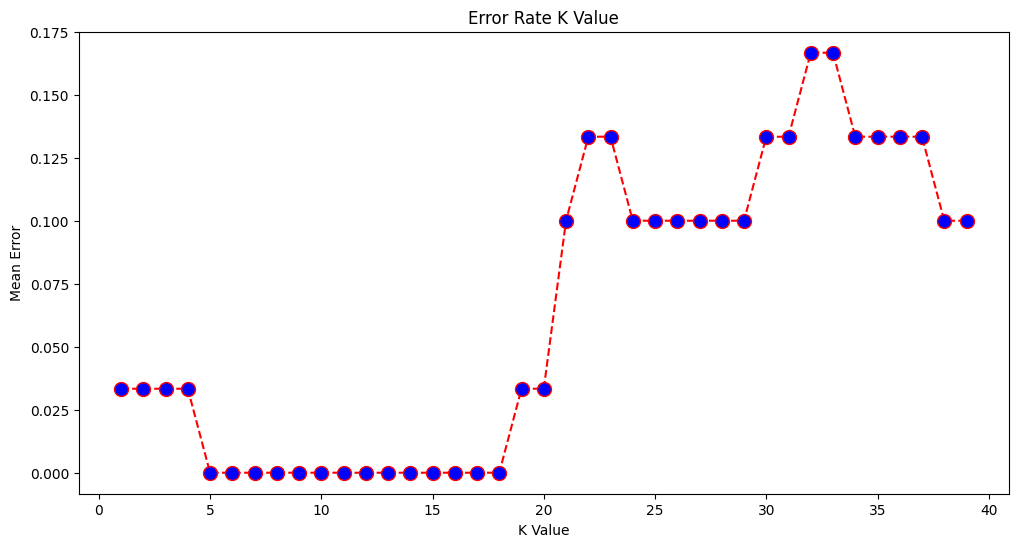

In [126]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNNClassifier(i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig("./fig.svg")